

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




 A pergunta que nosso modelo tenta responder é: 


# É possível prever o indíce baseado no passado? 

 O Ibovespa é o principal indicador de desempenho das ações negociadas na bolsa de valores B3, composto pelas empresas mais importantes do mercado de capitais brasileiros, é um ótimo paramêtro da economia nacional.



## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Regressão linear em python

Para podermos usar a regressão linear no nosso projeto usamos as seguintes bibliotecas: sklearn.model_selection, sklearn.linear_model e sklearn.metrics. A primeira foi usada para separar os dados para teste com proporção de 20% dos dados. A segunda biblioteca foi usada para calcular a reta da regressão linear; no comando usado já foi calculado todos os coeficientes e vetor de resíduo. A terceira biblioteca foi usada para se calcular o coeficiente de determinação.  

## Sobre o nosso Modelo:


 Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Referências:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html
    -http://www.b3.com.br/pt_br/
    -https://finance.yahoo.com/

## Qual variável explicativa vai ser utilizada?

 A variável explicativa a ser utilzada no modelo será os valores do índice ibovespa anteriores, já que o modelo preditivo é baseado no passado do índice. Ou seja, o nosso X, vai ser equivalente ao Yn-1 
 

## Nosso modelo:

## Importando bibliotecas: 

In [537]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


## Lendo os arquivos de dados:

In [538]:
ibov=pd.read_csv("bov.csv")

# Análise exploratória dos dados:

## Dados do Ibovespa:

In [539]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [540]:
ibov["Close"].head()

0    85620.0
1    85641.0
2    85525.0
3    84914.0
4    85973.0
Name: Close, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (data e fechamento) para a análise:

In [541]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [542]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [543]:
date=ibov['Date']
pontos=ibov['Close']


## Gráfico do Ibovespa durante os anos de 2018 e 2019.

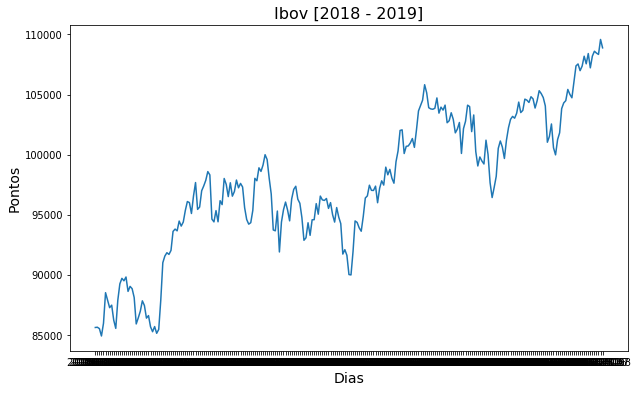

In [544]:
plt.figure(1, figsize=(10,6))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Boxplot do índice Ibovespa


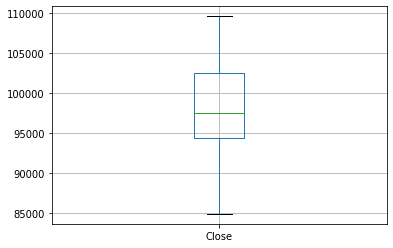

In [545]:
ibov.boxplot();


Nesse boxplot, é possível observar que, nesse período analisado, o indíce mantém a maioria dos seus valores entre 95.000 a 102.000 pontos, além disso, é possível observar a média do período, próximo a 97.000 pontos

## Histograma do Ibovespa

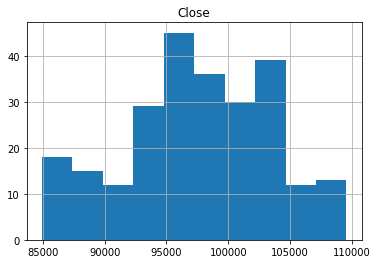

In [546]:
ibov.hist();

 Pelo histograma, é possivel analisar que as maiorias dos dados se encontram entre 95.000 pontos a 102.000 pontos.

In [573]:
ibov.describe()

,Close
count,249.000000
mean,97595.508879
std,5916.391315
min,84914.000000
25%,94389.000000
50%,97457.000000
75%,102551.000000
max,109581.000000


## Modelo: 

## Primeiro, vamos fazer um modelo baseado apenas no índice anterior:

### Criando um dataset com o Índice Ibov anterior:

In [547]:
lista = np.array(pontos)
lista=lista[1:]
ibov_anterior=pd.DataFrame(lista)




ibov_novo=ibov.join(ibov_anterior, lsuffix='_caller', rsuffix='_other')
ibovespa=ibov_novo.rename(columns={"Close": "Fechamento anterior", 0: "Fechamento"})
ibovespa=ibovespa.dropna()
ibovespa.head()


,Date,Fechamento anterior,Fechamento
0,2018-11-08,85620.0,85641.0
1,2018-11-09,85641.0,85525.0
2,2018-11-12,85525.0,84914.0
3,2018-11-13,84914.0,85973.0
4,2018-11-14,85973.0,88515.0


In [548]:
anterior=ibovespa["Fechamento anterior"]
fechamento=ibovespa["Fechamento"]

ibovespa.corr()

,Fechamento anterior,Fechamento
Fechamento anterior,1.000000,0.981372
Fechamento,0.981372,1.000000


### Separar dados para treinamento e teste

In [549]:
train, test = train_test_split(ibovespa, test_size=0.2)

### Treinamento

In [550]:
X_train = np.array(train["Fechamento anterior"]).reshape(-1, 1)
y_train = train['Fechamento']

In [551]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [552]:
print("B0=",model.intercept_)
print("B1=",model.coef_)

B0= 1326.0479667421023
B1= [0.98726568]


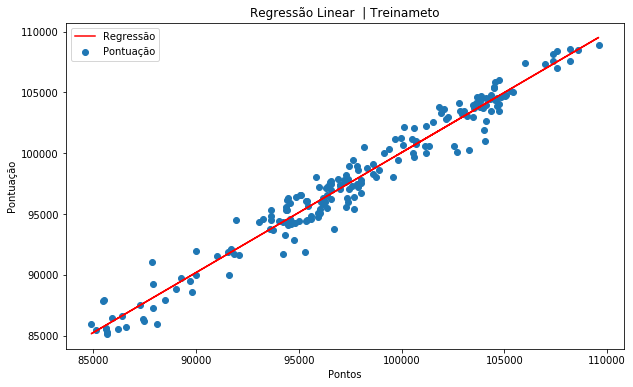

In [553]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

#### Teste

In [554]:
X_test = np.array(test["Fechamento anterior"]).reshape(-1, 1)
y_test = test['Fechamento']

In [555]:
model = LinearRegression()
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

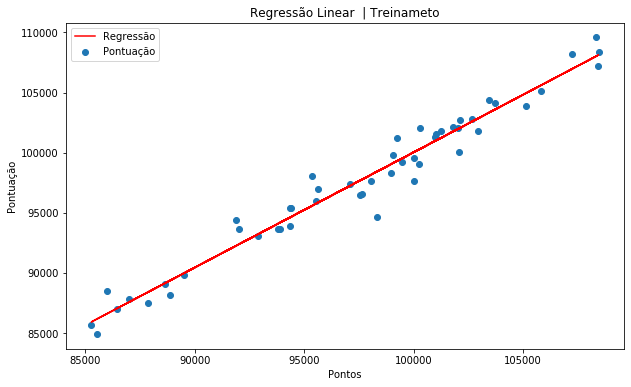

In [556]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_test, y_test, label='Pontuação')
plt.plot(X_test, y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

### R² (modelo com um anterior)

In [557]:
metrics.r2_score(y_test, y_pred)

0.9635320702415496

## Agora, vamos fazer um modelo baseado nos 4 índices anteriores:

In [558]:
vals=fechamento.values
K = 5
n = len(vals)
x_dias = []
for k in range(K):
    x = vals[k:(n-K+k)]
    x_dias.append(x)

x_dias = np.array(x_dias).transpose()

ibov_anterior1=pd.DataFrame(x_dias)
X = x_dias[:, :-1]
y = x_dias[:, -1:]

Aqui é separado os dados de teste e os dados para treinamento, os dados dados foram separados na seguinte proporção: 20% para teste e 80% para treinamento


In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [560]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [561]:
B0=model.intercept_
B=model.coef_



print("B0=",model.intercept_)
print("B's=",model.coef_)


B0= [1125.97987041]
B's= [[-0.05580324  0.17589602 -0.13942178  1.00814522]]


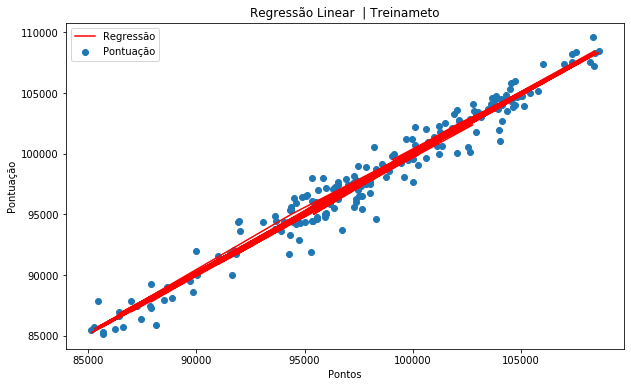

In [562]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train[:,3], y_train, label='Pontuação')
plt.plot(X_train[:,3], y_pred, color='r', label='Regressão')
plt.xlabel('Pontos')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [563]:
y_pred_t = model.predict(X_test)


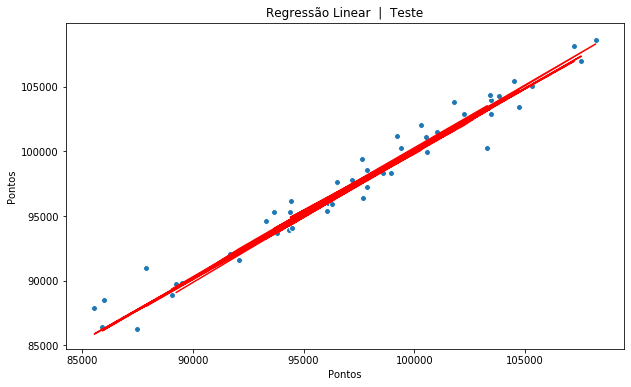

In [564]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  |  Teste')
plt.plot(X_test[:,3],y_pred_t , color='r', label='Regressão')
plt.scatter(X_test[:,3], y_test, edgecolor='w', label='Pontos')
plt.xlabel('Pontos')
plt.ylabel('Pontos')

plt.show()

## R² (modelo com 4 anteriores):

In [565]:
metrics.r2_score(y_test, y_pred_t)

0.9581372899847844

# Análise dos resíduos 

In [566]:
e=y_test-y_pred_t

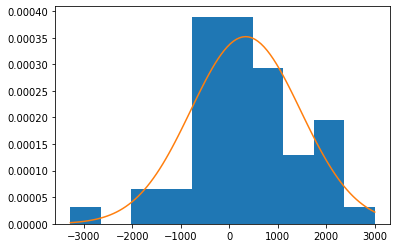

In [567]:
from scipy.stats import norm

mu, std = norm.fit(e)
        
x = np.linspace(min(e), max(e), 100)
p = norm.pdf(x, mu, std)
plt.hist(e, density=True)

plt.plot(x, p)
plt.show()




In [568]:
e=e.mean()
e

337.334487560236

# Conclusão:

$Yn=\beta_0+\beta_1Y(n-1)+\beta_2Y(n-2)+\beta_3Y(n-3)+\beta_4Y(n-4)$ + $\epsilon_i$

In [569]:
y=fechamento
y=np.array(y)
pred=[]

len(y)

248

In [570]:
n=0
while n < len(y)+1:
    if n>5:
        pred.append(1799.20843632-0.04825494*y[n-1]+0.16453675*y[n-2]-0.15793943*y[n-3]+1.02453412*y[n-4])
    n+=1


len(pred)


243

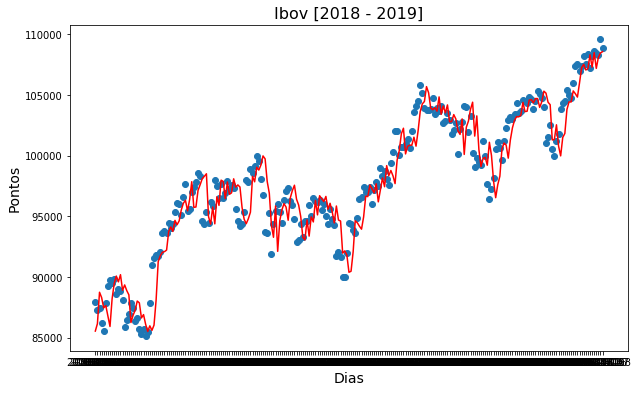

In [571]:
plt.figure(1, figsize=(10,6))
plt.scatter(date[6:], pontos[6:])
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.plot(date[6:], pred, color='r', label='Regressão')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();

In [572]:
pontos=pontos[6:]
metrics.r2_score(pontos, pred)

0.8881145201202465